<a href="https://colab.research.google.com/github/npasuparthi/nagendra-AI_ML/blob/master/SignalAnalysis_Proj_NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf

In [33]:
from google.colab import drive

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

In [35]:
import ipywidgets as widgets
from IPython.display import display

In [36]:
#@title ## Enter the name of the data file.
file_name = 'Signal.csv' #@param {type:"string"}

In [37]:
button = widgets.Button(description="Import Data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    pd.read_csv('/gdrive/MyDrive/GL/Project/Signal/' + file_name)
    print("Data Import completed")
  
button.on_click(on_button_clicked)
display(button, output)
#@title ## Impored data file.


Button(description='Import Data', style=ButtonStyle())

Output()

In [38]:
signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [40]:
signal.isnull().sum().sum()

0

In [41]:
signal.eq(0).any()

Parameter 1        False
Parameter 2        False
Parameter 3         True
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [42]:
signal['Parameter 3'].replace(to_replace=0, value=signal['Parameter 3'].median(), inplace=True)

In [43]:
signal['Signal_Strength'].unique()

array([5, 6, 7, 4, 8])

In [44]:
signal.eq(0).any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [45]:
# Rescale to 0 to 5
signal['Signal_Strength2'] = signal['Signal_Strength'] - 3

In [46]:
signal['Signal_Strength2'].unique()

array([2, 3, 4, 1, 5])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

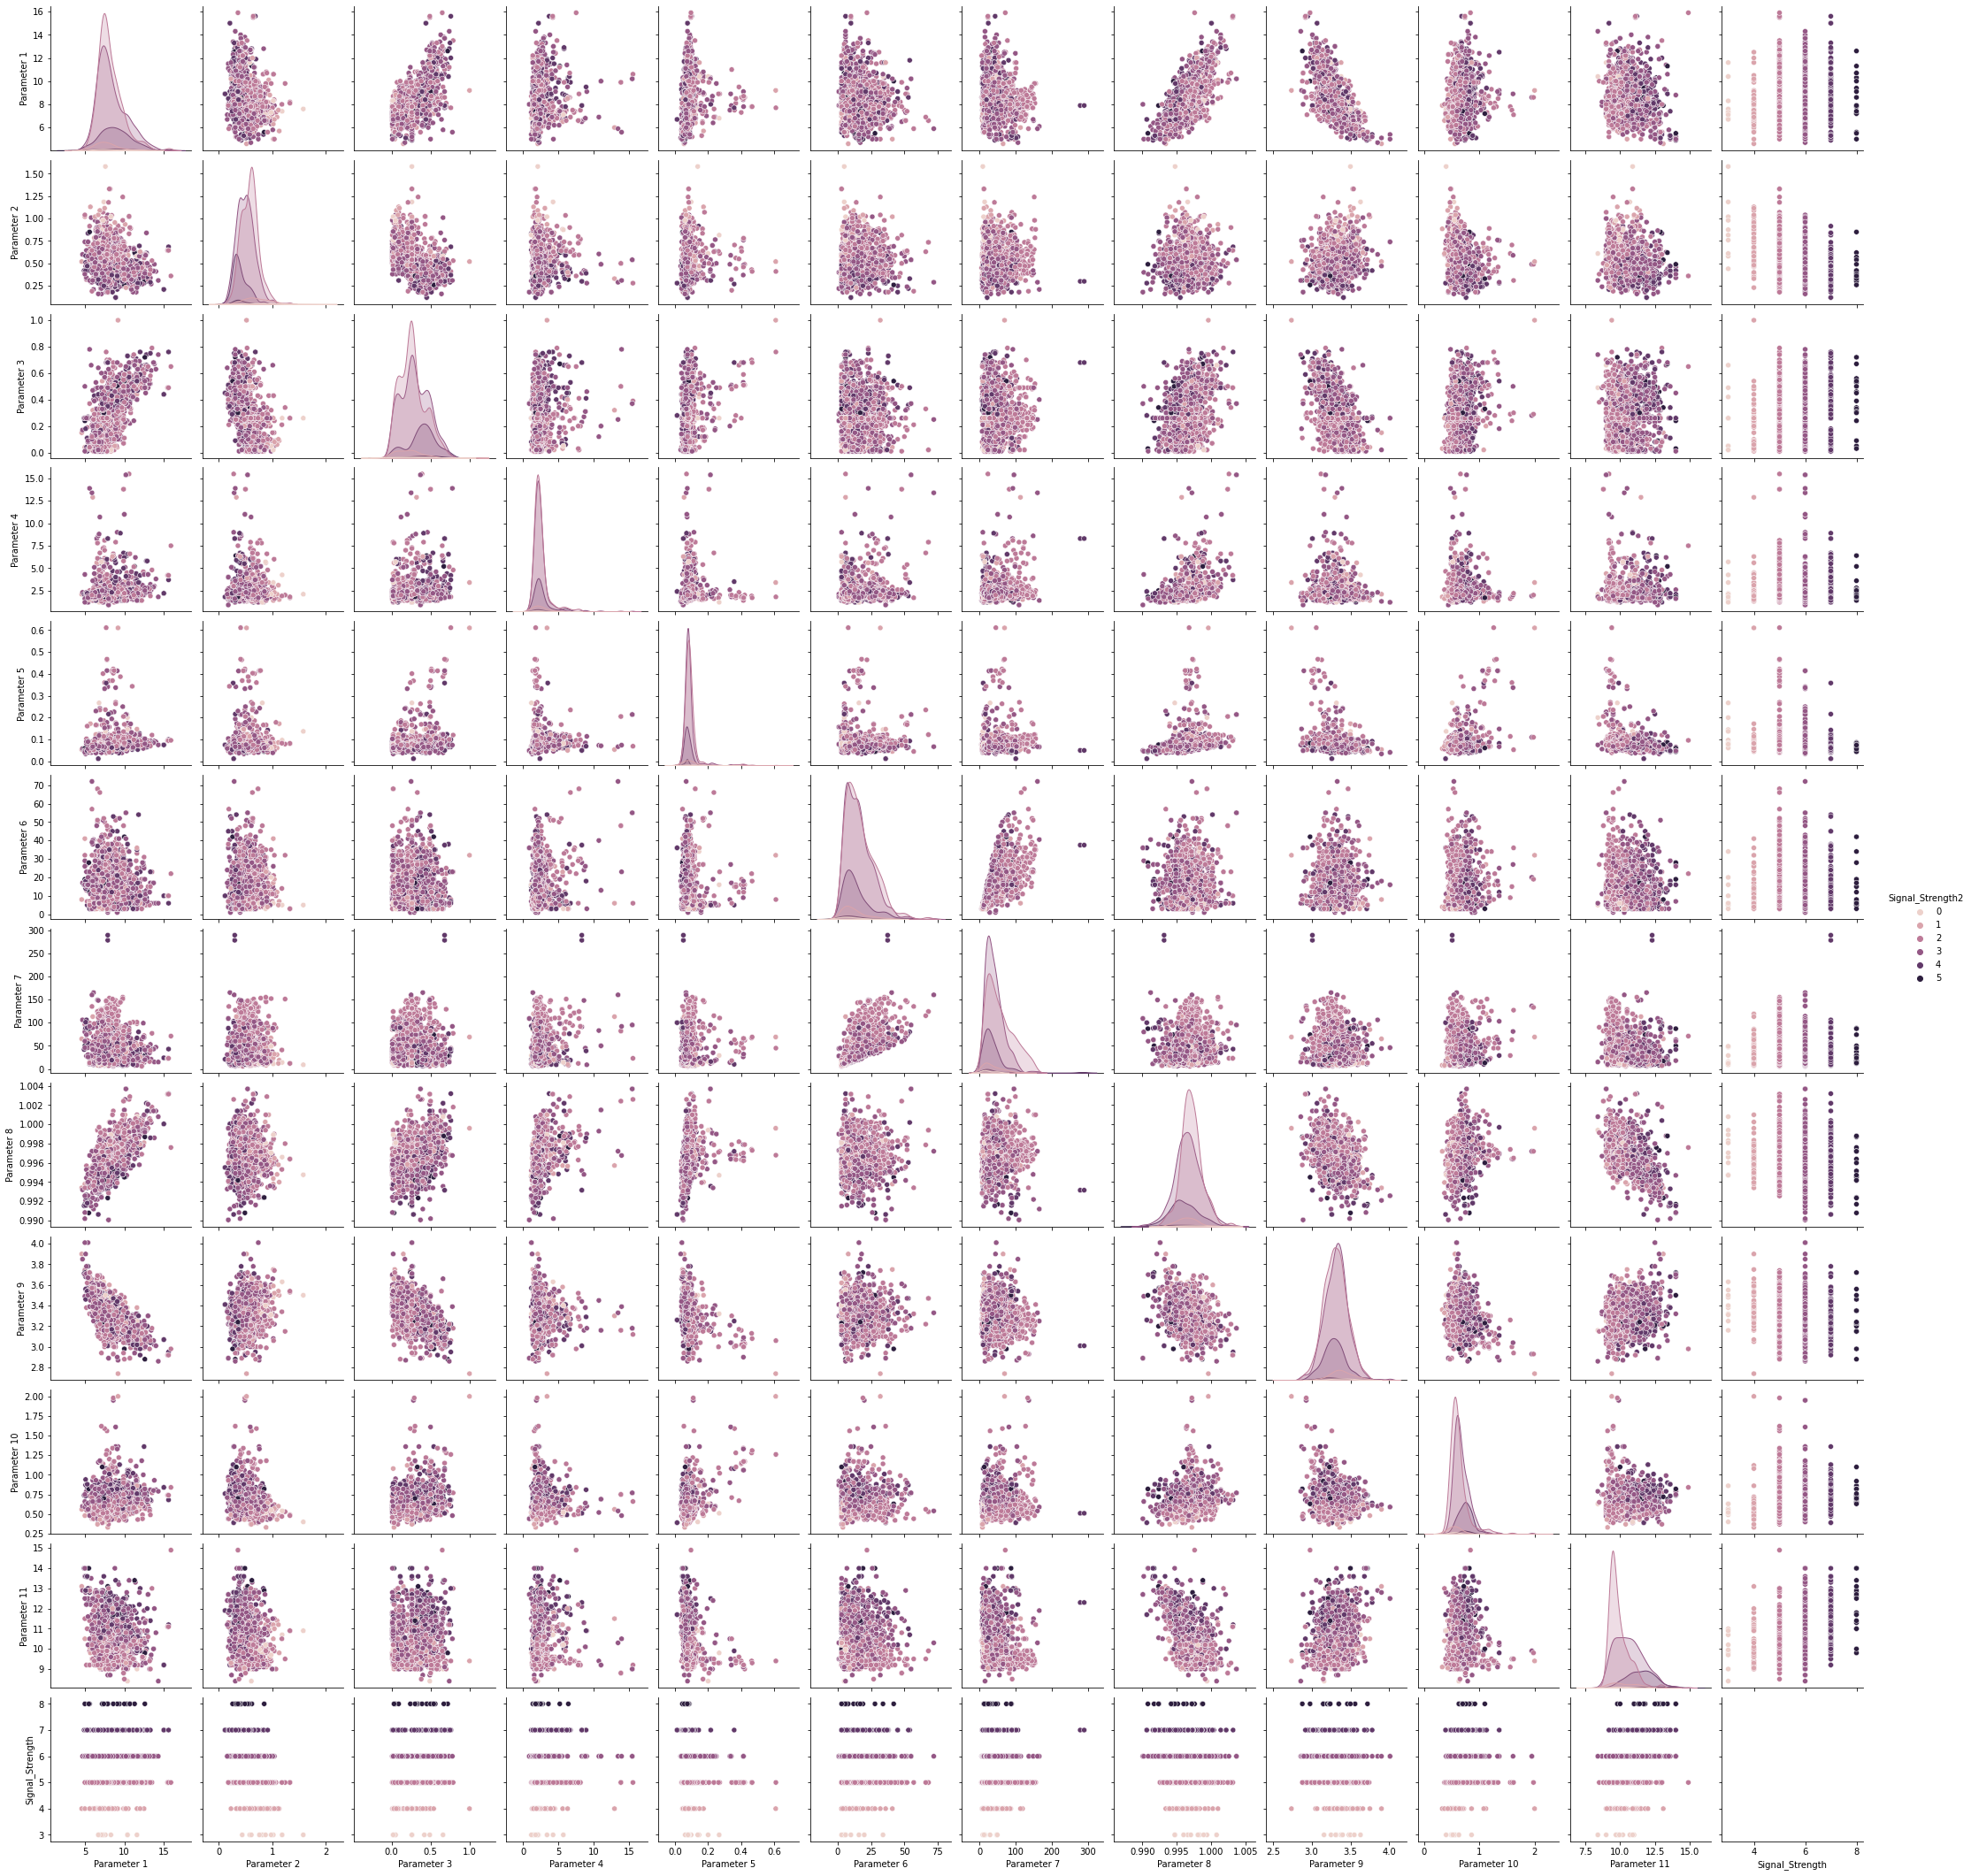

In [ ]:
import seaborn as sns
sns.pairplot(signal, hue='Signal_Strength2')

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

In [48]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength,Signal_Strength2
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.285541,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545,2.659545
std,1.646458,0.168531,0.174314,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605,0.781605
min,5.000000,0.120000,0.010000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000,1.000000
25%,7.100000,0.390000,0.140000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000,3.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000,3.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000,5.000000


In [49]:
# drop outliers
from scipy import stats
signal = signal[(np.abs(stats.zscore(signal)) < 3).all(axis=1)]

In [50]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength,Signal_Strength2
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,8.268381,0.523608,0.278192,2.272655,0.079473,14.987141,42.258699,0.996640,3.319660,0.634735,10.407615,5.652042,2.652042
std,1.604266,0.166006,0.171581,0.587585,0.015797,8.973625,26.900291,0.001662,0.139127,0.119446,0.999662,0.761458,0.761458
min,5.100000,0.120000,0.010000,1.200000,0.038000,1.000000,6.000000,0.991620,2.920000,0.330000,8.700000,4.000000,1.000000
25%,7.100000,0.390000,0.140000,1.900000,0.070000,7.000000,22.000000,0.995540,3.220000,0.550000,9.500000,5.000000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.078000,13.000000,35.000000,0.996600,3.320000,0.610000,10.200000,6.000000,3.000000
75%,9.100000,0.630000,0.410000,2.500000,0.088000,20.000000,56.000000,0.997600,3.410000,0.710000,11.100000,6.000000,3.000000
max,13.200000,1.025000,0.760000,4.800000,0.143000,43.000000,131.000000,1.001000,3.720000,1.020000,13.400000,8.000000,5.000000


In [51]:
y = signal['Signal_Strength2']
X = signal.drop(['Signal_Strength','Signal_Strength2'], axis=1)

In [52]:
X.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,8.268381,0.523608,0.278192,2.272655,0.079473,14.987141,42.258699,0.996640,3.319660,0.634735,10.407615
std,1.604266,0.166006,0.171581,0.587585,0.015797,8.973625,26.900291,0.001662,0.139127,0.119446,0.999662
min,5.100000,0.120000,0.010000,1.200000,0.038000,1.000000,6.000000,0.991620,2.920000,0.330000,8.700000
25%,7.100000,0.390000,0.140000,1.900000,0.070000,7.000000,22.000000,0.995540,3.220000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.078000,13.000000,35.000000,0.996600,3.320000,0.610000,10.200000
75%,9.100000,0.630000,0.410000,2.500000,0.088000,20.000000,56.000000,0.997600,3.410000,0.710000,11.100000
max,13.200000,1.025000,0.760000,4.800000,0.143000,43.000000,131.000000,1.001000,3.720000,1.020000,13.400000


In [53]:
X_z = X.apply(zscore)  # convert all attributes to Z scale 

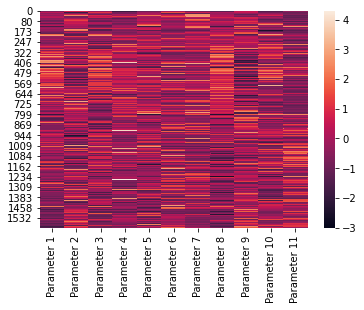

In [54]:
sns.heatmap(X_z)
# there is lot of correlation among the attributes

In [55]:
# first, I will use NN for a classification

X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=0.33, random_state=47)

In [56]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=6)
testY = tf.keras.utils.to_categorical(y_test, num_classes=6)

In [57]:
#Initialize Sequential model
classifierModel = tf.keras.models.Sequential()

#Normalize the data
classifierModel.add(tf.keras.layers.BatchNormalization())

In [58]:
#Add 1st hidden layer
classifierModel.add(tf.keras.layers.Dense(128, activation='tanh'))

In [59]:
#Add 2nd hidden layer
classifierModel.add(tf.keras.layers.Dense(64, activation='tanh'))

In [60]:
#Add 3rd hidden layer
classifierModel.add(tf.keras.layers.Dense(64, activation='tanh'))

In [61]:
#Add 4th hidden layer
classifierModel.add(tf.keras.layers.Dense(32, activation='tanh'))

In [62]:
#Add OUTPUT layer
classifierModel.add(tf.keras.layers.Dense(6, activation='softmax'))

In [63]:
#Compile the model
classifierModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
#@title Neural Network Classifier
button = widgets.Button(description="Train Classifier")
output = widgets.Output()

def on_button_clicked_Train_Classfier(b):
  # Display the message within the output widget.
  with output:
    classifierModel.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=500,
          batch_size=512)
    print("Network trained")
  
button.on_click(on_button_clicked_Train_Classfier)
display(button, output)


Button(description='Train Classifier', style=ButtonStyle())

Output()

In [102]:
#Acheiving >97% accuracy


Epoch 1/500
2/2 [==============================] - 1s 192ms/step - loss: 1.8211 - accuracy: 0.1186 - val_loss: 1.7220 - val_accuracy: 0.1879
Epoch 2/500
2/2 [==============================] - 0s 37ms/step - loss: 1.7257 - accuracy: 0.1674 - val_loss: 1.6361 - val_accuracy: 0.3299
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 1.6518 - accuracy: 0.3058 - val_loss: 1.5647 - val_accuracy: 0.4029
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 1.5811 - accuracy: 0.4001 - val_loss: 1.5051 - val_accuracy: 0.4489
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 1.5298 - accuracy: 0.4458 - val_loss: 1.4551 - val_accuracy: 0.4885
Epoch 6/500
2/2 [==============================] - 0s 35ms/step - loss: 1.4882 - accuracy: 0.4656 - val_loss: 1.4123 - val_accuracy: 0.5198
Epoch 7/500
2/2 [==============================] - 0s 32ms/step - loss: 1.4537 - accuracy: 0.4906 - val_loss: 1.3756 - val_accuracy: 0.5324
Epoch 8/500
2/2 [==

In [104]:
#save the pickel


In [68]:
#@title Neural Network Classifier
button = widgets.Button(description="Save Pickle")
output = widgets.Output()

def on_button_clicked_save_pickle(b):
  # Display the message within the output widget.
  with output:
    pickle_name = '/gdrive/MyDrive/GL/Project/Signal/SignalClassifier.h5'
    classifierModel.save(pickle_name)
    print("Saved model to disk at path " + pickle_name)
  
button.on_click(on_button_clicked_save_pickle)
display(button, output)

Button(description='Save Pickle', style=ButtonStyle())

Output()

In [69]:
  #Now, building a Regressor model
  X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=0.33, random_state=47)

In [70]:
#Initialize Sequential model
regressorModel = tf.keras.models.Sequential()

#Normalize the data
regressorModel.add(tf.keras.layers.BatchNormalization())

In [71]:
#Add 1st hidden layer
regressorModel.add(tf.keras.layers.Dense(128, activation='relu'))

In [72]:
#Add 2nd hidden layer
regressorModel.add(tf.keras.layers.Dense(128, activation='relu'))

In [73]:
#Add 3rd hidden layer
regressorModel.add(tf.keras.layers.Dense(64, activation='relu'))

In [74]:
#Add 4th hidden layer
regressorModel.add(tf.keras.layers.Dense(32, activation='relu'))

In [75]:
#add output layer
regressorModel.add(tf.keras.layers.Dense(1))

In [146]:
regressorModel.compile(loss='mean_absolute_error',  optimizer=tf.keras.optimizers.Adam(0.0005))

In [77]:
#@title Neural Network Regressor
button = widgets.Button(description="Train Regressor")
output = widgets.Output()

def on_button_clicked_Train_regressor(b):
  # Display the message within the output widget.
  with output:
    classifierModel.fit(X_train,trainY, validation_data=(X_test,testY), epochs=500,batch_size=512)
    print("Network trained")
  
button.on_click(on_button_clicked_Train_regressor)
display(button, output)

Button(description='Train Regressor', style=ButtonStyle())

Output()

Epoch 1/1000
2/2 [==============================] - 0s 76ms/step - loss: 0.1191 - val_loss: 0.4548
Epoch 2/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1600 - val_loss: 0.4521
Epoch 3/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1397 - val_loss: 0.4524
Epoch 4/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1361 - val_loss: 0.4492
Epoch 5/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1399 - val_loss: 0.4502
Epoch 6/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1353 - val_loss: 0.4516
Epoch 7/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.1416 - val_loss: 0.4514
Epoch 8/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.1278 - val_loss: 0.4439
Epoch 9/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1221 - val_loss: 0.4472
Epoch 10/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1364 - val_loss: 0.4499
Epoch 11/

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = regressorModel.predict(X_train)
print("MSE on train data is " + str(np.sqrt(mean_squared_error(y_train,pred_train))))

pred = regressorModel.predict(X_test)
print("MSE on test data is " + str(np.sqrt(mean_squared_error(y_test,pred))))

MSE on train data is 2.725902817024502
MSE on test data is 2.6836646387357623


In [81]:
#@title Neural Network Classifier
button = widgets.Button(description="Save Pickle")
output = widgets.Output()

def on_button_clicked_save_regressor_pickle(b):
  # Display the message within the output widget.
  with output:
    pickle_name = '/gdrive/MyDrive/GL/Project/Signal/SignalRegressor.h5'
    classifierModel.save(pickle_name)
    print("Saved model to disk at path " + pickle_name)
  
button.on_click(on_button_clicked_save_regressor_pickle)
display(button, output)

Button(description='Save Pickle', style=ButtonStyle())

Output()